In [3]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)
%matplotlib inline

# LONGS

In [5]:
l = pandas.read_pickle("../output/stats_longs.pickle")

In [6]:
l.head()

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
0,0.25,4.0,0.2,0.0,0.6,0.0,0.6,0.2,0.20,0.34,0.99,1.00,1.01,1.0,0.00,278,51.44,5.99,143.00,137.01,1.04,0.02,0.13,16.95,0.35
1,0.25,4.0,0.2,0.0,0.6,0.0,0.8,0.2,0.27,0.34,1.31,1.33,1.02,1.0,0.00,278,42.45,-5.06,157.46,162.52,0.97,-0.01,0.07,26.09,-0.19
2,0.25,4.0,0.2,0.0,0.6,0.0,1.0,0.2,0.34,0.34,1.64,1.67,1.02,1.0,0.36,278,38.49,4.53,178.36,173.83,1.03,0.01,0.04,22.12,0.20
3,0.25,4.0,0.2,0.0,0.6,0.0,1.2,0.2,0.41,0.34,1.96,2.00,1.02,1.0,0.36,278,35.25,12.65,195.53,182.88,1.07,0.02,0.29,27.07,0.47
4,0.25,4.0,0.2,0.0,0.6,0.0,1.4,0.2,0.47,0.34,2.29,2.33,1.02,1.0,0.36,278,33.09,25.23,214.13,188.90,1.13,0.04,0.98,27.28,0.92


In [7]:
l.sort_values(by='profit_factor', ascending=False).head(10)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
306,0.25,4.0,0.2,0.0,1.8,0.0,4.2,0.61,1.42,0.34,2.27,2.33,1.01,1.0,1.44,278,36.33,52.53,230.72,178.19,1.29,0.08,4.35,20.84,2.52
305,0.25,4.0,0.2,0.0,1.8,0.0,4.0,0.61,1.35,0.34,2.17,2.22,1.01,1.0,1.08,278,37.05,49.06,225.22,176.16,1.28,0.08,3.96,21.28,2.31
304,0.25,4.0,0.2,0.0,1.8,0.0,3.8,0.61,1.29,0.34,2.07,2.11,1.01,1.0,0.72,278,38.13,47.38,220.53,173.15,1.27,0.08,3.88,21.74,2.18
354,0.25,4.0,0.2,0.0,2.0,0.0,4.2,0.68,1.42,0.34,2.05,2.10,1.01,1.0,1.44,278,38.13,45.15,218.18,173.03,1.26,0.08,3.56,18.63,2.42
353,0.25,4.0,0.2,0.0,2.0,0.0,4.0,0.68,1.35,0.34,1.96,2.00,1.01,1.0,1.08,278,38.85,41.64,212.67,171.03,1.24,0.08,3.17,19.28,2.16
352,0.25,4.0,0.2,0.0,2.0,0.0,3.8,0.68,1.29,0.34,1.86,1.90,1.01,1.0,0.72,278,39.93,40.03,208.05,168.02,1.24,0.08,3.08,20.54,1.95
307,0.25,4.0,0.2,0.0,1.8,0.0,4.4,0.61,1.49,0.34,2.36,2.44,1.01,1.0,1.80,278,34.17,41.59,225.79,184.20,1.23,0.06,2.62,23.83,1.75
327,0.25,4.0,0.2,0.0,1.8,0.0,8.4,0.61,2.84,0.34,3.86,4.66,1.01,1.0,6.47,278,24.10,47.82,260.20,212.38,1.23,0.04,2.12,34.04,1.40
303,0.25,4.0,0.2,0.0,1.8,0.0,3.6,0.61,1.22,0.34,1.96,2.00,1.01,1.0,0.72,278,38.49,38.88,211.03,172.15,1.23,0.07,2.76,22.31,1.74
355,0.25,4.0,0.2,0.0,2.0,0.0,4.4,0.68,1.49,0.34,2.14,2.20,1.00,1.0,2.16,278,36.33,39.16,216.42,177.26,1.22,0.07,2.57,21.33,1.84


<AxesSubplot:xlabel='stop_b', ylabel='profit_factor'>

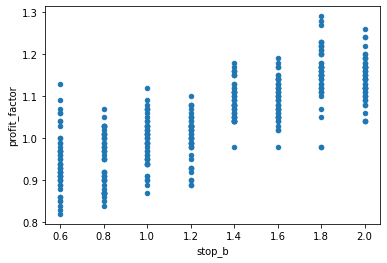

In [8]:
l.plot.scatter(x='stop_b', y='profit_factor')

In [9]:
o_stop = 1.8

STOP 0.6


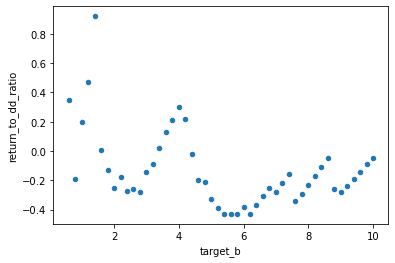

STOP 0.8


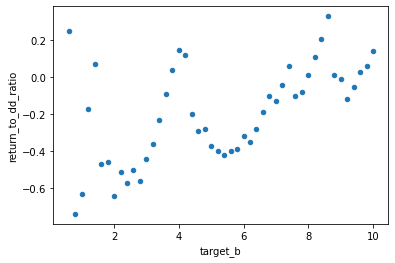

STOP 1.0


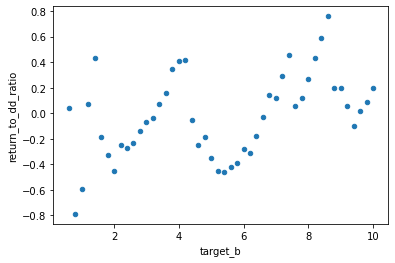

STOP 1.2


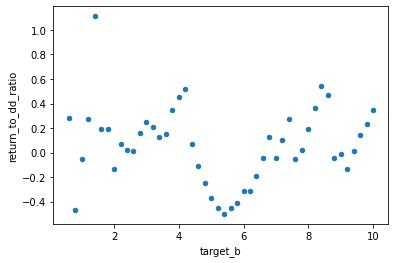

STOP 1.4


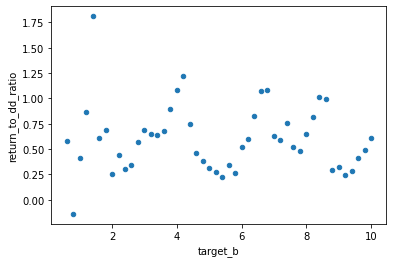

STOP 1.6


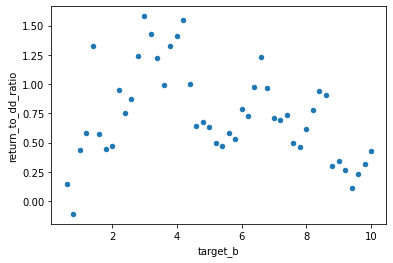

STOP 1.8


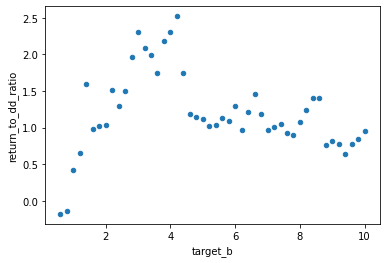

STOP 2.0


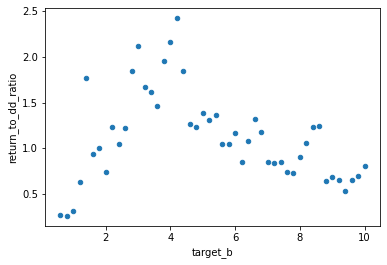

In [10]:
for stop_b in l['stop_b'].unique():
    print(f'STOP {stop_b}')
    l[l['stop_b'] == stop_b].plot.scatter(x='target_b', y='return_to_dd_ratio')
    plt.show()
    

STOP 1.4


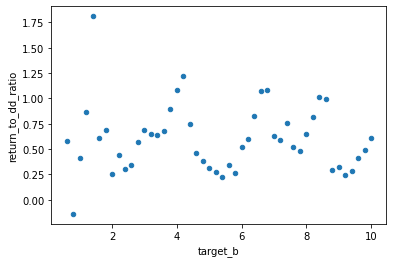

STOP 1.6


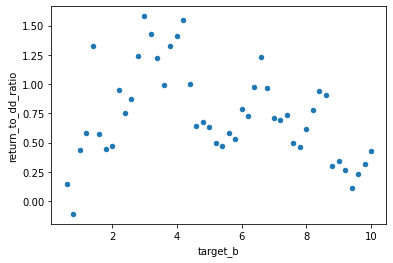

STOP 1.8


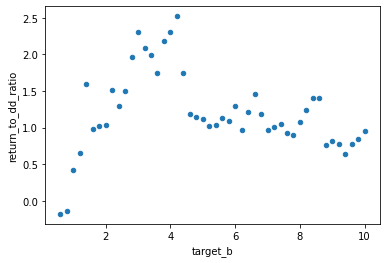

STOP 2.0


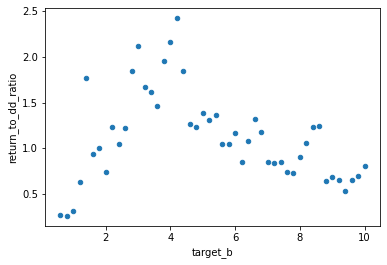

In [11]:
for stop_b in [round(x, 2) for x in np.arange(1.4,2.1,0.2)]:
    print(f'STOP {stop_b}')
    l[l['stop_b'] == stop_b].plot.scatter(x='target_b', y='return_to_dd_ratio')
    plt.show()
    

STOP 1.4
     profit_factor: 1.08
return_to_dd_ratio: 0.585


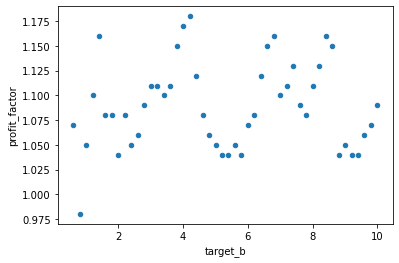

STOP 1.6
     profit_factor: 1.1
return_to_dd_ratio: 0.685


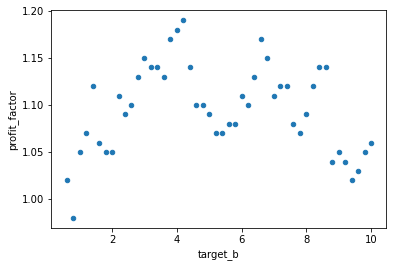

STOP 1.8
     profit_factor: 1.16
return_to_dd_ratio: 1.105


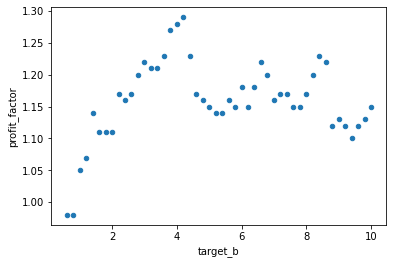

STOP 2.0
     profit_factor: 1.14
return_to_dd_ratio: 1.0550000000000002


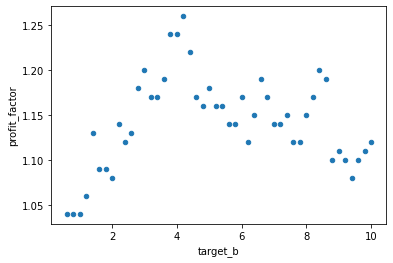

In [12]:
for stop_b in [round(x, 2) for x in np.arange(1.4,2.1,0.2)]:
    print(f'STOP {stop_b}')
    print(f'     profit_factor: {l[l["stop_b"] == stop_b]["profit_factor"].median()}')
    print(f'return_to_dd_ratio: {l[l["stop_b"] == stop_b]["return_to_dd_ratio"].median()}')
    l[l['stop_b'] == stop_b].plot.scatter(x='target_b', y='profit_factor')
    plt.show()
    

      min_distance:  0.2
                pf:  1.23
return_to_dd_ratio:  2.05
    total_return_r:  27.90
         hit_count:  220.00


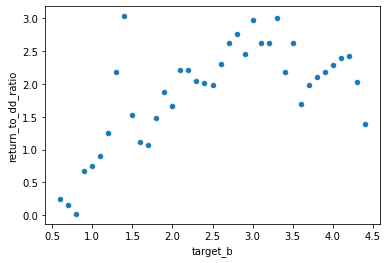

      min_distance:  0.3
                pf:  1.18
return_to_dd_ratio:  1.56
    total_return_r:  22.57
         hit_count:  216.00


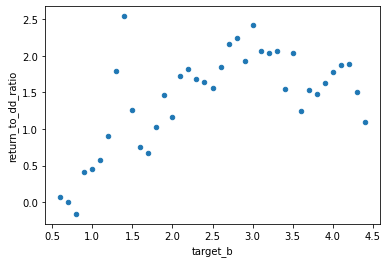

      min_distance:  0.4
                pf:  1.23
return_to_dd_ratio:  2.21
    total_return_r:  26.14
         hit_count:  208.00


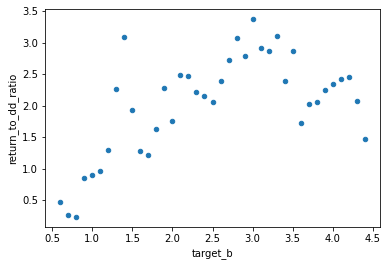

      min_distance:  0.5
                pf:  1.27
return_to_dd_ratio:  2.40
    total_return_r:  29.30
         hit_count:  198.00


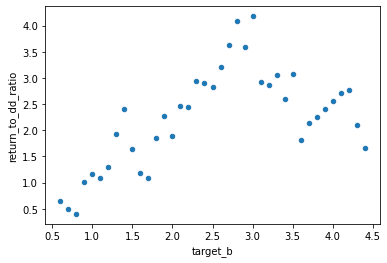

      min_distance:  0.6
                pf:  1.29
return_to_dd_ratio:  2.34
    total_return_r:  27.95
         hit_count:  182.00


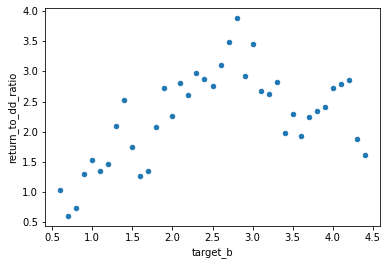

      min_distance:  0.7
                pf:  1.34
return_to_dd_ratio:  2.56
    total_return_r:  29.88
         hit_count:  169.00


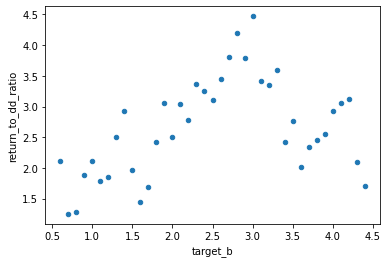

      min_distance:  0.8
                pf:  1.28
return_to_dd_ratio:  2.17
    total_return_r:  22.04
         hit_count:  155.00


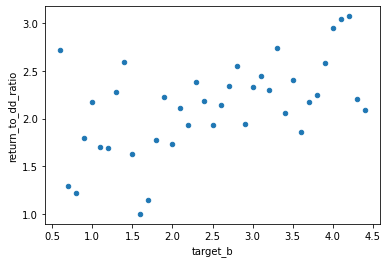

      min_distance:  0.9
                pf:  1.29
return_to_dd_ratio:  2.33
    total_return_r:  19.44
         hit_count:  143.00


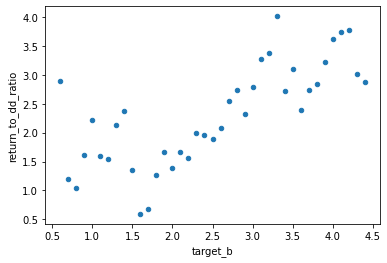

      min_distance:  1.0
                pf:  1.30
return_to_dd_ratio:  2.14
    total_return_r:  20.68
         hit_count:  132.00


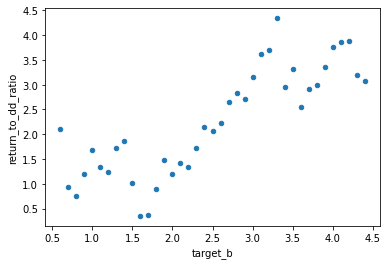

      min_distance:  1.1
                pf:  1.23
return_to_dd_ratio:  1.59
    total_return_r:  14.59
         hit_count:  121.00


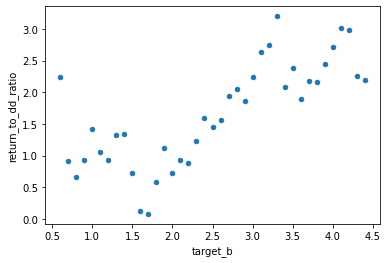

      min_distance:  1.2
                pf:  1.18
return_to_dd_ratio:  1.02
    total_return_r:  11.22
         hit_count:  107.00


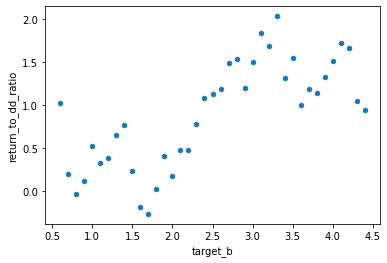

      min_distance:  1.3
                pf:  1.26
return_to_dd_ratio:  1.49
    total_return_r:  13.95
         hit_count:  97.00


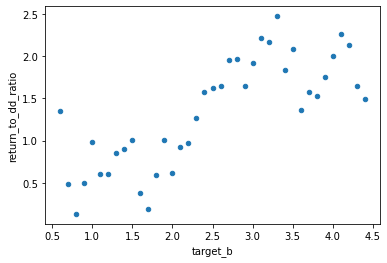

      min_distance:  1.4
                pf:  1.21
return_to_dd_ratio:  1.13
    total_return_r:  11.18
         hit_count:  89.00


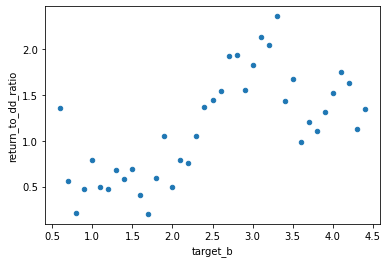

      min_distance:  1.5
                pf:  1.30
return_to_dd_ratio:  1.69
    total_return_r:  14.20
         hit_count:  80.00


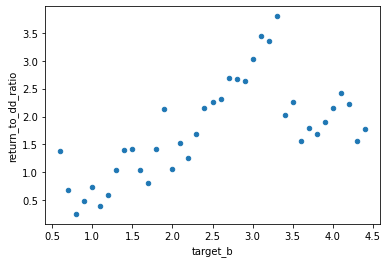

In [47]:
l = pandas.read_pickle("../output/stats_longs.pickle")
stop_b =  1.8

for min_distance in l['min_distance'].unique():
    ds = l[(l['min_distance'] == min_distance) & (l['target_b'] < 4.5)]
    print(f'      min_distance:  {min_distance}')
    print(f'                pf:  {ds["profit_factor"].median():0.2f}')
    print(f'return_to_dd_ratio:  {ds["return_to_dd_ratio"].median():0.2f}')
    print(f'    total_return_r:  {ds["total_return_r"].median():0.2f}')
    print(f'         hit_count:  {ds["hit_count"].median():0.2f}')
    
#     ds.plot.scatter(x='target_b', y='profit_factor')
#     plt.show()
    
    ds.plot.scatter(x='target_b', y='return_to_dd_ratio')
    plt.show()

#     ds.plot.scatter(x='target_b', y='total_return_r')
#     plt.show()

#     ds.plot.scatter(x='target_b', y='max_drawdown')
#     plt.show()

#     ds.plot.scatter(x='target_b', y='win_rate')
#     plt.show()


In [62]:
l = pandas.read_pickle("../output/stats_longs.pickle")
l = l.sort_values(by='return_to_dd_ratio', ascending=False)
# l[l['profit_factor'] > 1.5].head(100)
l.head(20)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
342,0.6,1.2,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.00,1.0,0.0,139,79.86,16.30,44.4,28.10,1.58,0.29,4.78,3.62,4.50
646,0.7,1.2,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.00,1.0,0.0,128,80.47,16.10,41.2,25.10,1.64,0.31,5.06,3.62,4.45
304,0.6,1.0,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.00,1.0,0.0,99,81.82,14.36,32.4,18.04,1.80,0.36,5.21,3.40,4.22
684,0.7,1.4,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.36,0.4,0.4,1.00,1.0,0.0,157,80.25,19.30,50.4,31.10,1.62,0.31,5.93,4.62,4.18
912,0.8,1.0,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.38,0.4,0.4,1.00,1.0,0.0,79,79.75,9.16,25.2,16.04,1.57,0.29,2.66,2.20,4.16
608,0.7,1.0,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.38,0.4,0.4,1.00,1.0,0.0,90,81.11,12.16,29.2,17.04,1.71,0.34,4.11,3.00,4.05
380,0.6,1.4,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.36,0.4,0.4,1.00,1.0,0.0,169,79.29,18.50,53.6,35.10,1.53,0.27,5.06,4.62,4.00
38,0.5,1.2,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.36,0.4,0.4,1.00,1.0,0.0,152,78.95,15.90,48.0,32.10,1.50,0.26,4.16,4.00,3.98
1558,1.0,1.2,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.39,0.4,0.4,1.01,1.0,0.0,94,79.79,10.90,30.0,19.10,1.57,0.29,3.16,2.82,3.87
1,0.5,1.0,0.2,0.5,0.0,0.3,0.0,0.5,0.3,0.36,0.6,0.6,1.00,1.0,0.0,110,70.91,14.72,46.8,32.08,1.46,0.22,3.28,3.80,3.87


In [63]:
l = pandas.read_pickle("../output/stats_longs.pickle")
l = l.sort_values(by='return_to_dd_ratio', ascending=False)
# l[l['profit_factor'] > 1.5].head(100)
l.head(20)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
0,0.7,1.4,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.36,0.4,0.4,1.0,1.0,0.0,157,80.25,19.3,50.4,31.1,1.62,0.31,5.93,4.62,4.18


In [64]:
# FORWARD TEST
l = pandas.read_pickle("../output/stats_longs.pickle")
l = l.sort_values(by='return_to_dd_ratio', ascending=False)
# l[l['profit_factor'] > 1.5].head(100)
l.head(20)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
0,0.7,1.4,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.35,0.4,0.4,1.0,1.0,0.0,20,80.0,2.4,6.4,4.0,1.6,0.3,0.72,1.0,2.4


In [65]:
# FORWARD TEST TAKE 2
l = pandas.read_pickle("../output/stats_longs.pickle")
l = l.sort_values(by='return_to_dd_ratio', ascending=False)
# l[l['profit_factor'] > 1.5].head(100)
l.head(20)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
21,0.6,2.0,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.0,1.0,0.0,23,82.61,3.6,7.6,4.0,1.90,0.39,1.41,1.0,3.60
20,0.6,1.9,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.0,1.0,0.0,23,82.61,3.6,7.6,4.0,1.90,0.39,1.41,1.0,3.60
19,0.6,1.8,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.0,1.0,0.0,23,82.61,3.6,7.6,4.0,1.90,0.39,1.41,1.0,3.60
32,0.7,2.0,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.35,0.4,0.4,1.0,1.0,0.0,22,81.82,3.2,7.2,4.0,1.80,0.36,1.16,1.0,3.20
31,0.7,1.9,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.35,0.4,0.4,1.0,1.0,0.0,22,81.82,3.2,7.2,4.0,1.80,0.36,1.16,1.0,3.20
30,0.7,1.8,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.35,0.4,0.4,1.0,1.0,0.0,22,81.82,3.2,7.2,4.0,1.80,0.36,1.16,1.0,3.20
18,0.6,1.7,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.35,0.4,0.4,1.0,1.0,0.0,22,81.82,3.2,7.2,4.0,1.80,0.36,1.16,1.0,3.20
15,0.6,1.4,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.0,1.0,0.0,21,80.95,2.8,6.8,4.0,1.70,0.33,0.93,1.0,2.80
29,0.7,1.7,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.33,0.4,0.4,1.0,1.0,0.0,21,80.95,2.8,6.8,4.0,1.70,0.33,0.93,1.0,2.80
17,0.6,1.6,0.2,0.5,0.0,0.2,0.0,0.5,0.2,0.37,0.4,0.4,1.0,1.0,0.0,21,80.95,2.8,6.8,4.0,1.70,0.33,0.93,1.0,2.80
